In [1]:
import pandas as pd
import numpy as np

ds = pd.read_csv('decor.csv')
ds.head(10)

,country_label,country,decor_label,decor,type_label,type,file
0,1,Russia,1,Gzhel,1,pattern,01_01_1_001.png
1,1,Russia,1,Gzhel,1,pattern,01_01_1_002.png
2,1,Russia,1,Gzhel,1,pattern,01_01_1_003.png
3,1,Russia,1,Gzhel,1,pattern,01_01_1_004.png
4,1,Russia,1,Gzhel,1,pattern,01_01_1_005.png
5,1,Russia,1,Gzhel,1,pattern,01_01_1_006.png
6,1,Russia,1,Gzhel,1,pattern,01_01_1_007.png
7,1,Russia,1,Gzhel,1,pattern,01_01_1_008.png
8,1,Russia,1,Gzhel,1,pattern,01_01_1_009.png
9,1,Russia,1,Gzhel,1,pattern,01_01_1_010.png


### Data preprocessing

1. Podział obrazków na foldery z odpowiednimi Labelami
2. Konwersja z png(RGBA) na jpg(RGB)

In [2]:
import os
from PIL import Image


for _,item in ds.iterrows():
    if item["type"] == "product":
        country = item["country"]
        decor = item["decor"]
        file = item["file"]
        
        in_image_path = f'decor/{file}'
        im = Image.open(in_image_path)
        out_image_path = f"../tf_files/decor/{country}_{decor}/{file}"        
        out_image_path = out_image_path[:-3] + "jpg"
        os.makedirs(os.path.dirname(out_image_path), exist_ok=True)
        rgb_im = im.convert('RGB')
        rgb_im.save(out_image_path)

In [3]:
#help
!cd .. && python -m scripts.retrain -h

/home/kristinka/.virtualenvs/ml/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
usage: retrain.py [-h] [--image_dir IMAGE_DIR] [--output_graph OUTPUT_GRAPH]
                  [--intermediate_output_graphs_dir INTERMEDIATE_OUTPUT_GRAPHS_DIR]
                  [--intermediate_store_frequency INTERMEDIATE_STORE_FREQUENCY]
                  [--output_labels OUTPUT_LABELS]
                  [--summaries_dir SUMMARIES_DIR]
                  [--how_many_training_steps HOW_MANY_TRAINING_STEPS]
                  [--learning_rate LEARNING_RATE]
                  [--testing_percentage TESTING_PERCENTAGE]
                  [--validation_percentage VALIDATION_PERCENTAGE]
                  [--eval_step_interval EVAL_STEP_INTERVAL]
                  [--train_b

In [21]:
IMAGE_SIZE=224
ARCHITECTURE=f"mobilenet_0.50_{IMAGE_SIZE}"

!cd .. && python -m scripts.retrain \
  --bottleneck_dir=tf_files/bottlenecks \
  --model_dir=tf_files/models/$ARCHITECTURE \
  --summaries_dir=tf_files/training_summaries/$ARCHITECTURE \
  --output_graph=tf_files/retrained_graph.pb \
  --output_labels=tf_files/retrained_labels.txt \
  --architecture=$ARCHITECTURE \
  --image_dir=tf_files/decor 

/home/kristinka/.virtualenvs/ml/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
INFO:tensorflow:Looking for images in 'Belarus_Neglyubka'
INFO:tensorflow:Looking for images in 'Poland_Wycinanki łowickie'
INFO:tensorflow:Looking for images in 'Poland_Wzory kaszubskie'
INFO:tensorflow:Looking for images in 'Russia_Gorodets'
INFO:tensorflow:Looking for images in 'Russia_Gzhel'
INFO:tensorflow:Looking for images in 'Russia_Khokhloma'
INFO:tensorflow:Looking for images in 'Turkey_Iznik'
2018-05-07 10:51:23.160717: I tensorflow/core/platform/cpu_feature_guard.cc:140] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
INFO:tensorflow:100 bottleneck files created.
INFO:tensorflow:200 bottleneck files created.
In

INFO:tensorflow:2018-05-07 10:51:40.460800: Step 280: Train accuracy = 100.0%
INFO:tensorflow:2018-05-07 10:51:40.461008: Step 280: Cross entropy = 0.009468
INFO:tensorflow:2018-05-07 10:51:40.509209: Step 280: Validation accuracy = 89.0% (N=100)
INFO:tensorflow:2018-05-07 10:51:41.095585: Step 290: Train accuracy = 100.0%
INFO:tensorflow:2018-05-07 10:51:41.095870: Step 290: Cross entropy = 0.008636
INFO:tensorflow:2018-05-07 10:51:41.162512: Step 290: Validation accuracy = 97.0% (N=100)
INFO:tensorflow:2018-05-07 10:51:41.962905: Step 300: Train accuracy = 100.0%
INFO:tensorflow:2018-05-07 10:51:41.963128: Step 300: Cross entropy = 0.011513
INFO:tensorflow:2018-05-07 10:51:42.053186: Step 300: Validation accuracy = 88.0% (N=100)
INFO:tensorflow:2018-05-07 10:51:42.785878: Step 310: Train accuracy = 100.0%
INFO:tensorflow:2018-05-07 10:51:42.786121: Step 310: Cross entropy = 0.009367
INFO:tensorflow:2018-05-07 10:51:42.844079: Step 310: Validation accuracy = 91.0% (N=100)
INFO:tensorf

INFO:tensorflow:2018-05-07 10:52:05.024898: Step 610: Validation accuracy = 86.0% (N=100)
INFO:tensorflow:2018-05-07 10:52:05.608980: Step 620: Train accuracy = 100.0%
INFO:tensorflow:2018-05-07 10:52:05.609157: Step 620: Cross entropy = 0.006525
INFO:tensorflow:2018-05-07 10:52:05.664543: Step 620: Validation accuracy = 86.0% (N=100)
INFO:tensorflow:2018-05-07 10:52:06.195670: Step 630: Train accuracy = 100.0%
INFO:tensorflow:2018-05-07 10:52:06.195840: Step 630: Cross entropy = 0.007249
INFO:tensorflow:2018-05-07 10:52:06.245895: Step 630: Validation accuracy = 87.0% (N=100)
INFO:tensorflow:2018-05-07 10:52:06.852408: Step 640: Train accuracy = 100.0%
INFO:tensorflow:2018-05-07 10:52:06.852585: Step 640: Cross entropy = 0.005897
INFO:tensorflow:2018-05-07 10:52:06.909989: Step 640: Validation accuracy = 90.0% (N=100)
INFO:tensorflow:2018-05-07 10:52:07.451144: Step 650: Train accuracy = 100.0%
INFO:tensorflow:2018-05-07 10:52:07.451387: Step 650: Cross entropy = 0.006653
INFO:tensorf

INFO:tensorflow:2018-05-07 10:52:25.487813: Step 950: Train accuracy = 100.0%
INFO:tensorflow:2018-05-07 10:52:25.488038: Step 950: Cross entropy = 0.005098
INFO:tensorflow:2018-05-07 10:52:25.561827: Step 950: Validation accuracy = 90.0% (N=100)
INFO:tensorflow:2018-05-07 10:52:26.101612: Step 960: Train accuracy = 100.0%
INFO:tensorflow:2018-05-07 10:52:26.101824: Step 960: Cross entropy = 0.005191
INFO:tensorflow:2018-05-07 10:52:26.152021: Step 960: Validation accuracy = 90.0% (N=100)
INFO:tensorflow:2018-05-07 10:52:26.675958: Step 970: Train accuracy = 100.0%
INFO:tensorflow:2018-05-07 10:52:26.676127: Step 970: Cross entropy = 0.004241
INFO:tensorflow:2018-05-07 10:52:26.730796: Step 970: Validation accuracy = 86.0% (N=100)
INFO:tensorflow:2018-05-07 10:52:27.231554: Step 980: Train accuracy = 100.0%
INFO:tensorflow:2018-05-07 10:52:27.231726: Step 980: Cross entropy = 0.004137
INFO:tensorflow:2018-05-07 10:52:27.292203: Step 980: Validation accuracy = 91.0% (N=100)
INFO:tensorf

INFO:tensorflow:2018-05-07 10:52:43.614981: Step 1280: Train accuracy = 100.0%
INFO:tensorflow:2018-05-07 10:52:43.615150: Step 1280: Cross entropy = 0.004027
INFO:tensorflow:2018-05-07 10:52:43.663069: Step 1280: Validation accuracy = 92.0% (N=100)
INFO:tensorflow:2018-05-07 10:52:44.138518: Step 1290: Train accuracy = 100.0%
INFO:tensorflow:2018-05-07 10:52:44.138698: Step 1290: Cross entropy = 0.003529
INFO:tensorflow:2018-05-07 10:52:44.189478: Step 1290: Validation accuracy = 92.0% (N=100)
INFO:tensorflow:2018-05-07 10:52:44.672865: Step 1300: Train accuracy = 100.0%
INFO:tensorflow:2018-05-07 10:52:44.673031: Step 1300: Cross entropy = 0.002735
INFO:tensorflow:2018-05-07 10:52:44.722520: Step 1300: Validation accuracy = 83.0% (N=100)
INFO:tensorflow:2018-05-07 10:52:45.223741: Step 1310: Train accuracy = 100.0%
INFO:tensorflow:2018-05-07 10:52:45.223907: Step 1310: Cross entropy = 0.004028
INFO:tensorflow:2018-05-07 10:52:45.274177: Step 1310: Validation accuracy = 91.0% (N=100)


INFO:tensorflow:2018-05-07 10:53:02.574793: Step 1610: Train accuracy = 100.0%
INFO:tensorflow:2018-05-07 10:53:02.574964: Step 1610: Cross entropy = 0.003222
INFO:tensorflow:2018-05-07 10:53:02.622326: Step 1610: Validation accuracy = 88.0% (N=100)
INFO:tensorflow:2018-05-07 10:53:03.195023: Step 1620: Train accuracy = 100.0%
INFO:tensorflow:2018-05-07 10:53:03.195213: Step 1620: Cross entropy = 0.002638
INFO:tensorflow:2018-05-07 10:53:03.261863: Step 1620: Validation accuracy = 88.0% (N=100)
INFO:tensorflow:2018-05-07 10:53:03.901293: Step 1630: Train accuracy = 100.0%
INFO:tensorflow:2018-05-07 10:53:03.901485: Step 1630: Cross entropy = 0.003231
INFO:tensorflow:2018-05-07 10:53:03.967307: Step 1630: Validation accuracy = 89.0% (N=100)
INFO:tensorflow:2018-05-07 10:53:04.727169: Step 1640: Train accuracy = 100.0%
INFO:tensorflow:2018-05-07 10:53:04.727354: Step 1640: Cross entropy = 0.002132
INFO:tensorflow:2018-05-07 10:53:04.809787: Step 1640: Validation accuracy = 89.0% (N=100)


INFO:tensorflow:2018-05-07 10:53:26.921977: Step 1940: Train accuracy = 100.0%
INFO:tensorflow:2018-05-07 10:53:26.922154: Step 1940: Cross entropy = 0.002567
INFO:tensorflow:2018-05-07 10:53:26.977036: Step 1940: Validation accuracy = 92.0% (N=100)
INFO:tensorflow:2018-05-07 10:53:27.510100: Step 1950: Train accuracy = 100.0%
INFO:tensorflow:2018-05-07 10:53:27.510289: Step 1950: Cross entropy = 0.002527
INFO:tensorflow:2018-05-07 10:53:27.565005: Step 1950: Validation accuracy = 84.0% (N=100)
INFO:tensorflow:2018-05-07 10:53:28.135227: Step 1960: Train accuracy = 100.0%
INFO:tensorflow:2018-05-07 10:53:28.135401: Step 1960: Cross entropy = 0.002569
INFO:tensorflow:2018-05-07 10:53:28.189689: Step 1960: Validation accuracy = 91.0% (N=100)
INFO:tensorflow:2018-05-07 10:53:28.724665: Step 1970: Train accuracy = 100.0%
INFO:tensorflow:2018-05-07 10:53:28.724838: Step 1970: Cross entropy = 0.002439
INFO:tensorflow:2018-05-07 10:53:28.780199: Step 1970: Validation accuracy = 91.0% (N=100)


INFO:tensorflow:2018-05-07 10:53:46.426601: Step 2270: Train accuracy = 100.0%
INFO:tensorflow:2018-05-07 10:53:46.426836: Step 2270: Cross entropy = 0.002364
INFO:tensorflow:2018-05-07 10:53:46.481989: Step 2270: Validation accuracy = 83.0% (N=100)
INFO:tensorflow:2018-05-07 10:53:47.029401: Step 2280: Train accuracy = 100.0%
INFO:tensorflow:2018-05-07 10:53:47.029577: Step 2280: Cross entropy = 0.002135
INFO:tensorflow:2018-05-07 10:53:47.083906: Step 2280: Validation accuracy = 90.0% (N=100)
INFO:tensorflow:2018-05-07 10:53:47.608741: Step 2290: Train accuracy = 100.0%
INFO:tensorflow:2018-05-07 10:53:47.608973: Step 2290: Cross entropy = 0.002084
INFO:tensorflow:2018-05-07 10:53:47.698803: Step 2290: Validation accuracy = 90.0% (N=100)
INFO:tensorflow:2018-05-07 10:53:48.257326: Step 2300: Train accuracy = 100.0%
INFO:tensorflow:2018-05-07 10:53:48.257499: Step 2300: Cross entropy = 0.002849
INFO:tensorflow:2018-05-07 10:53:48.308103: Step 2300: Validation accuracy = 88.0% (N=100)


INFO:tensorflow:2018-05-07 10:54:05.859214: Step 2600: Train accuracy = 100.0%
INFO:tensorflow:2018-05-07 10:54:05.859399: Step 2600: Cross entropy = 0.001894
INFO:tensorflow:2018-05-07 10:54:05.912725: Step 2600: Validation accuracy = 88.0% (N=100)
INFO:tensorflow:2018-05-07 10:54:06.442599: Step 2610: Train accuracy = 100.0%
INFO:tensorflow:2018-05-07 10:54:06.442795: Step 2610: Cross entropy = 0.002009
INFO:tensorflow:2018-05-07 10:54:06.496529: Step 2610: Validation accuracy = 88.0% (N=100)
INFO:tensorflow:2018-05-07 10:54:07.028194: Step 2620: Train accuracy = 100.0%
INFO:tensorflow:2018-05-07 10:54:07.028359: Step 2620: Cross entropy = 0.002309
INFO:tensorflow:2018-05-07 10:54:07.079094: Step 2620: Validation accuracy = 87.0% (N=100)
INFO:tensorflow:2018-05-07 10:54:07.602234: Step 2630: Train accuracy = 100.0%
INFO:tensorflow:2018-05-07 10:54:07.602467: Step 2630: Cross entropy = 0.001885
INFO:tensorflow:2018-05-07 10:54:07.654022: Step 2630: Validation accuracy = 84.0% (N=100)


INFO:tensorflow:2018-05-07 10:54:25.210462: Step 2930: Train accuracy = 100.0%
INFO:tensorflow:2018-05-07 10:54:25.210635: Step 2930: Cross entropy = 0.001946
INFO:tensorflow:2018-05-07 10:54:25.264032: Step 2930: Validation accuracy = 87.0% (N=100)
INFO:tensorflow:2018-05-07 10:54:25.783175: Step 2940: Train accuracy = 100.0%
INFO:tensorflow:2018-05-07 10:54:25.783343: Step 2940: Cross entropy = 0.001674
INFO:tensorflow:2018-05-07 10:54:25.835217: Step 2940: Validation accuracy = 92.0% (N=100)
INFO:tensorflow:2018-05-07 10:54:26.362213: Step 2950: Train accuracy = 100.0%
INFO:tensorflow:2018-05-07 10:54:26.362394: Step 2950: Cross entropy = 0.001588
INFO:tensorflow:2018-05-07 10:54:26.414345: Step 2950: Validation accuracy = 89.0% (N=100)
INFO:tensorflow:2018-05-07 10:54:26.937523: Step 2960: Train accuracy = 100.0%
INFO:tensorflow:2018-05-07 10:54:26.937760: Step 2960: Cross entropy = 0.001753
INFO:tensorflow:2018-05-07 10:54:26.990673: Step 2960: Validation accuracy = 87.0% (N=100)


INFO:tensorflow:2018-05-07 10:54:44.980089: Step 3260: Train accuracy = 100.0%
INFO:tensorflow:2018-05-07 10:54:44.980271: Step 3260: Cross entropy = 0.001262
INFO:tensorflow:2018-05-07 10:54:45.026068: Step 3260: Validation accuracy = 89.0% (N=100)
INFO:tensorflow:2018-05-07 10:54:45.540579: Step 3270: Train accuracy = 100.0%
INFO:tensorflow:2018-05-07 10:54:45.540756: Step 3270: Cross entropy = 0.001522
INFO:tensorflow:2018-05-07 10:54:45.593799: Step 3270: Validation accuracy = 82.0% (N=100)
INFO:tensorflow:2018-05-07 10:54:46.086927: Step 3280: Train accuracy = 100.0%
INFO:tensorflow:2018-05-07 10:54:46.087092: Step 3280: Cross entropy = 0.001616
INFO:tensorflow:2018-05-07 10:54:46.143011: Step 3280: Validation accuracy = 89.0% (N=100)
INFO:tensorflow:2018-05-07 10:54:46.627575: Step 3290: Train accuracy = 100.0%
INFO:tensorflow:2018-05-07 10:54:46.627740: Step 3290: Cross entropy = 0.001552
INFO:tensorflow:2018-05-07 10:54:46.682138: Step 3290: Validation accuracy = 84.0% (N=100)


INFO:tensorflow:2018-05-07 10:55:04.217693: Step 3590: Train accuracy = 100.0%
INFO:tensorflow:2018-05-07 10:55:04.217951: Step 3590: Cross entropy = 0.001341
INFO:tensorflow:2018-05-07 10:55:04.290249: Step 3590: Validation accuracy = 86.0% (N=100)
INFO:tensorflow:2018-05-07 10:55:04.796758: Step 3600: Train accuracy = 100.0%
INFO:tensorflow:2018-05-07 10:55:04.796984: Step 3600: Cross entropy = 0.001369
INFO:tensorflow:2018-05-07 10:55:04.879786: Step 3600: Validation accuracy = 86.0% (N=100)
INFO:tensorflow:2018-05-07 10:55:05.433332: Step 3610: Train accuracy = 100.0%
INFO:tensorflow:2018-05-07 10:55:05.433521: Step 3610: Cross entropy = 0.001457
INFO:tensorflow:2018-05-07 10:55:05.483618: Step 3610: Validation accuracy = 88.0% (N=100)
INFO:tensorflow:2018-05-07 10:55:05.982404: Step 3620: Train accuracy = 100.0%
INFO:tensorflow:2018-05-07 10:55:05.982572: Step 3620: Cross entropy = 0.001967
INFO:tensorflow:2018-05-07 10:55:06.035410: Step 3620: Validation accuracy = 89.0% (N=100)


INFO:tensorflow:2018-05-07 10:55:23.589652: Step 3920: Train accuracy = 100.0%
INFO:tensorflow:2018-05-07 10:55:23.589838: Step 3920: Cross entropy = 0.001465
INFO:tensorflow:2018-05-07 10:55:23.646410: Step 3920: Validation accuracy = 94.0% (N=100)
INFO:tensorflow:2018-05-07 10:55:24.258550: Step 3930: Train accuracy = 100.0%
INFO:tensorflow:2018-05-07 10:55:24.258812: Step 3930: Cross entropy = 0.001314
INFO:tensorflow:2018-05-07 10:55:24.315739: Step 3930: Validation accuracy = 89.0% (N=100)
INFO:tensorflow:2018-05-07 10:55:24.858762: Step 3940: Train accuracy = 100.0%
INFO:tensorflow:2018-05-07 10:55:24.858931: Step 3940: Cross entropy = 0.001291
INFO:tensorflow:2018-05-07 10:55:24.915870: Step 3940: Validation accuracy = 88.0% (N=100)
INFO:tensorflow:2018-05-07 10:55:25.423660: Step 3950: Train accuracy = 100.0%
INFO:tensorflow:2018-05-07 10:55:25.423830: Step 3950: Cross entropy = 0.001287
INFO:tensorflow:2018-05-07 10:55:25.471624: Step 3950: Validation accuracy = 92.0% (N=100)


Używając tensorboard widzimy, że występuje lekki overfitting. 

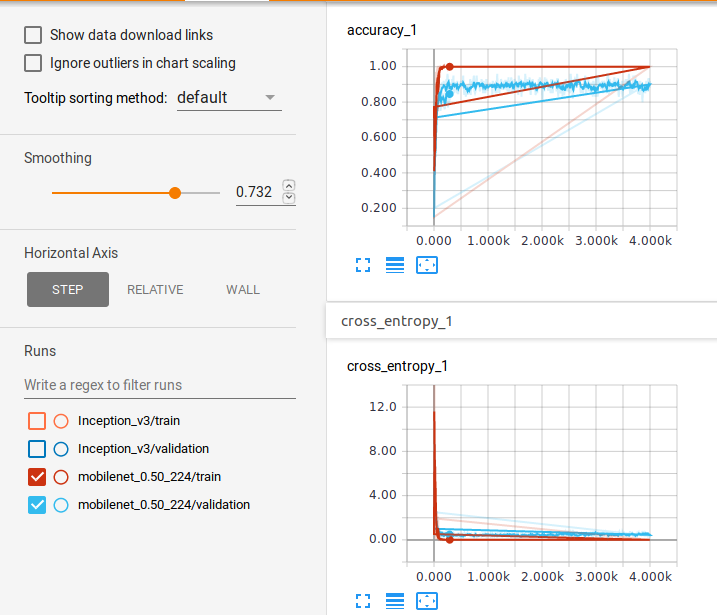

### Jak możemy polepszyć wyniki? 

Niżej przykład, który teoretycznie da lepsze wyniki dzięki zastosowaniu ***data augmentation***, lecz ze względu na ograniczoną moc obliczeniową nie mogłam tego sprawdzić.


In [15]:
# !cd .. && python -m scripts.retrain \
#   --bottleneck_dir=tf_files/bottlenecks \
#   --model_dir=tf_files/models/$ARCHITECTURE \
#   --summaries_dir=tf_files/training_summaries/$ARCHITECTURE \
#   --output_graph=tf_files/retrained_graph.pb \
#   --output_labels=tf_files/retrained_labels.txt \
#   --architecture=$ARCHITECTURE \
#   --image_dir=tf_files/decor \
#   --flip_left_right \
#   --random_crop=10  \
#   --random_scale=10  \
#   --random_brightness=10

### Sprawdzenie wytrenowanego modelu na randomowym przykładzie

In [20]:
!cd .. && python -m scripts.label_image \
    --graph=tf_files/retrained_graph.pb  \
    --image=tf_files/decor/Russia_Gorodets/01_03_2_004.jpg

/home/kristinka/.virtualenvs/ml/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
2018-05-07 10:50:49.679224: I tensorflow/core/platform/cpu_feature_guard.cc:140] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA

Evaluation time (1-image): 0.114s

russia gorodets 0.99871016
poland wzory kaszubskie 0.001009078
russia khokhloma 0.00016576392
turkey iznik 9.353505e-05
belarus neglyubka 1.4404202e-05
